<a href="https://colab.research.google.com/github/mathewhall100/Numpy-linear-regression-from-scratch/blob/master/numpy_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy linear regression from scratch

I couldn't resist coding my own 'hello world' project of  machine learning, an implementation of linear regression using just python and numpy.  We will use the Boston house price dataset because it is easy to download and its very familiar. There are 14 features in the dataset:
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
     
* And, MEDV - median value of owner-occupied homes in $1000's, which we will use as the labels.

First, a  series of functions for scaling the features, calculating a loss function (either MSE or SSEs) and performing gradient descent are defined, then used to   demonstrate linear regression with decreasing loss.  

The functions are then modified to create a python linear regression class (lin_reg) which we use to fit a regression model with the data and then make predictions on a test set. 

Finally we create a subclass with an added method to score the accuracy of our model (lin_reg_score). The models accuracy is then compared with scikit-learn's implementation of linear regression. 


## Linear regression using numpy

In [0]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
drive_dir = "/content/gdrive/My Drive/"

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import numpy as np
from numpy import expand_dims
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt


In [0]:
# load data

dataset = load_boston()
print(dataset.data.shape)

X = dataset.data  # feature set
y = expand_dims(dataset.target, axis=1) # label set
df_boston = pd.DataFrame(X, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BLACK', 'LSTAT'])
df_boston.head()


(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Mean overall house price: $22532
Median overall house price: $21200
 


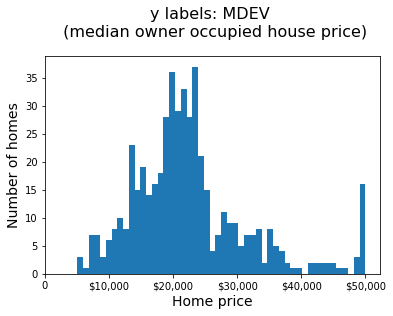

In [0]:
# Examine the y labels (actual house prices at sale)
print(f'Mean overall house price: ${(y.mean()*1000).astype(int)}')
print(f'Median overall house price: ${(np.median(y)*1000).astype(int)}')
print(" ")

# histogram of label values (actual house prices)
plt.hist(y, bins=50)
plt.ylabel('Number of homes', fontsize='14')
plt.xlabel('Home price', fontsize='14')
plt.xticks((0,10,20,30,40,50), ['0', '$10,000', '$20,000', '$30,000', '$40,000', '$50,000'])
plt.title('y labels: MDEV \n (median owner occupied house price)', fontsize='16', pad=20)
plt.show()

In [0]:
num_samples = len(y)
num_features = np.size(X, 1)
print(f'Samples: {num_samples}')
print(f'Features: {num_features}')

Samples: 506
Features: 13


In [0]:
# To compare features with different scales we must standardise the data (feature scaling)
# We will rescale our data such that mean (mu) is 0 and standard deviation (sigma) is 1 using the formula z = (x - mu)/sigma

X = np.hstack((np.ones((num_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))


In [0]:
# Loss function
# MSE = mean squared error
# SSE = sum squared errors

def calc_loss(X, y, weights):
  y_hat = X @ weights
  MSE = np.square(np.subtract(y_hat,y)).mean()
# SSE (1/(2*num_samples))*np.sum((y_hat - y)**2)
  return MSE
            

In [0]:
# Gradient descent algorithm
# lr = learning rate
# n = number of iterations

def gradient_descent(X, y, weights, lr, n):
  losses = np.zeros((n, 1))
  for i in range(n):
    weights = weights - (lr/num_samples) * X.T @ (X @ weights - y)
    losses[i] = calc_loss(X, y, weights)
  return losses

Initial loss: 592.1469169960474
Final loss: 22.014267624925974
Num iterations: 1500


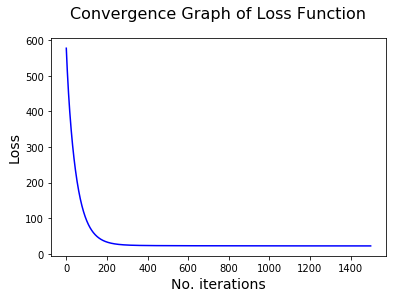

In [0]:
# Initialise weights to zero.
weights = np.zeros((num_features+1, 1))

n = 1500  # number of iterations
lr = 0.01  # learning rate

initial_loss = calc_loss(X, y, weights)
print(f'Initial loss: {initial_loss}')

losses = gradient_descent(X, y, weights, lr, n)
print(f'Final loss: {losses[-1][0]}')
print(f'Num iterations: {n}')

plt.plot(range(len(losses)), losses, 'b')
plt.title("Convergence Graph of Loss Function", fontsize='16', pad=20)
plt.xlabel("No. iterations", fontsize='14')
plt.ylabel("Loss", fontsize='14')
plt.show()
      

## Implementation as a python class

In [0]:
# Lets create a python class, lin_reg, from the above functions
# add methods to scale, fit and make predictions from our data

class lin_reg():
    def __init__(self, X, y, lr=0.03, n=1500):

        self.lr = lr
        self.n = n
        self.num_samples = len(y)
        self.num_features = np.size(X, 1)
        self.X = X
        self.y = expand_dims(y, axis=1) 
        self.weights = np.zeros((self.num_features + 1, 1))
        
    def scale(self, X, num_samples=None):
      if num_samples == None: num_samples = self.num_samples
      return np.hstack((np.ones((num_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))

    def fit(self):
        X = self.scale(self.X)
        for i in range(self.n):
            self.weights = self.weights - (self.lr/self.num_samples) * X.T @ (X @ self.weights - self.y)
        return self

    def predict(self, X):
        return self.scale(X, np.size(X,0)) @ self.weights

In [0]:
# So this is a stand alone implementation lets reload the dataset 
# For simplicity, we will use scikit-learn to split our dataset into training and test sets

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

dataset = load_boston()

X = dataset.data
y = dataset.target


X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3, random_state=42)

lin_reg_model = lin_reg(X_train, y_train).fit()

In [0]:
# lets make a set of predictions from the test set
pred_y = lin_reg_model.predict(X_test)
for i in range(5):
  price = (pred_y[i][0]*1000).astype(int)
  print(f'Predicted price: ${price}')

Predicted price: $30788
Predicted price: $38653
Predicted price: $17131
Predicted price: $26791
Predicted price: $20343


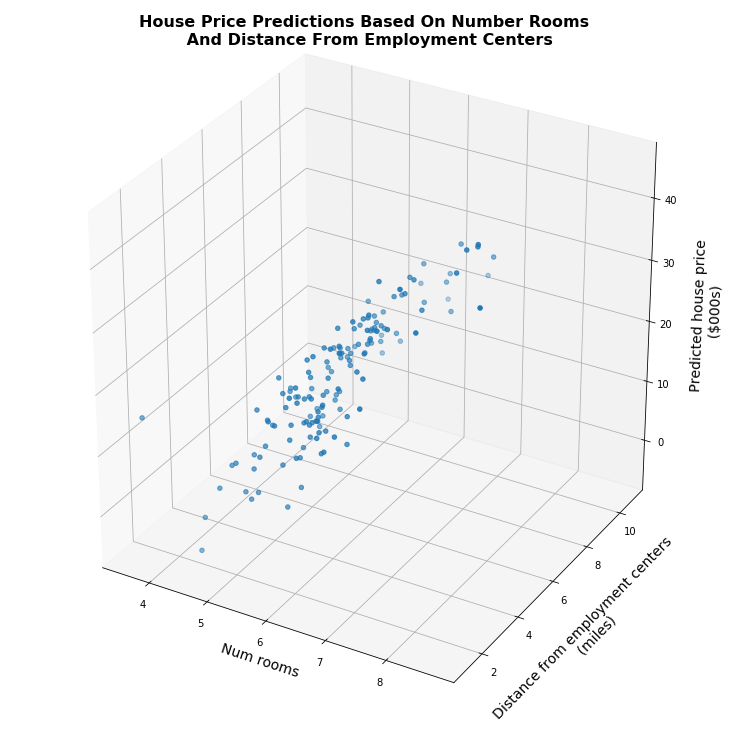

In [0]:
# Plot the results against some of the variables 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_vals = list(X_test[:,5])  # Number of rooms
y_vals = list(X_test[:,7])  # Ave distance from employment centers
z_vals = list(pred_y)       # Our models house price predictions based on all 13 dataset features 

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)

ax.scatter(x_vals, y_vals, z_vals)
ax.set_xlabel('Num rooms', fontsize='14')
ax.set_ylabel('Distance from employment centers \n (miles)', fontsize='14', labelpad=20)
ax.set_zlabel('Predicted house price \n ($000s)', fontsize='14', labelpad=20)
ax.set_title('House Price Predictions Based On Number Rooms \n And Distance From Employment Centers', fontsize='16', fontweight='bold', pad=20)
plt.show()

## Accuracy calculation and comparison with scikit-learn

In [0]:
# Create a new class, (lin_reg_score) and allow it to inherit methods from lin_reg superclass
# then add a score method so we can use our new class for accuracy comparisons as well as scaling, fitting and predicting

class lin_reg_score(lin_reg):
  def __init__(self, X=None, y=None):
      lin_reg.__init__(self, X, y, lr=0.03, n=1500)

  def accuracy(self, X, y):
      if X is None:
          X = self.X
      else:
          X = self.scale(X, np.size(X, 0))

      if y is None:
          y = self.y
      else:
          y = expand_dims(y, axis=1)

      y_pred = X @ self.weights
      SSE = ((y - y_pred)**2).sum() 
      SS = ((y - y.mean())**2).sum()
      return 1 - (SSE / SS)

In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd


dataset = load_boston()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3, random_state=42)


np_regressor = lin_reg_score(X_train, y_train).fit()
np_train_accuracy = np_regressor.accuracy(X_train, y_train)
np_test_accuracy = np_regressor.accuracy(X_test, y_test)

sklearn_regressor = LinearRegression().fit(X_train, y_train)
sklearn_train_accuracy = sklearn_regressor.score(X_train, y_train)
sklearn_test_accuracy = sklearn_regressor.score(X_test, y_test)

pd.DataFrame([[np_train_accuracy, sklearn_train_accuracy],[np_test_accuracy, sklearn_test_accuracy]],
             ['Training Accuracy', 'Test Accuracy'],    
             ['Numpy linear regressor', 'Sklearn\'s liner regressor'])

,Numpy linear regressor,Sklearn's liner regressor
Training Accuracy,0.743482,0.743500
Test Accuracy,0.675347,0.711226


In [0]:
# That's it folks!